In [2]:
import numpy as np
import pandas as pd

In [8]:
# Load the dataset
loaded_data = np.load("my_dataset_2.npz", allow_pickle=True)

# Access images and labels
loaded_images = loaded_data['images']

# Now you can use loaded_images and loaded_labels in your code
image_df_2=pd.DataFrame(loaded_images)
image_df_2.head()

,0,1,2,3,4,5,6,7,8,9,...,51520,51521,51522,51523,51524,51525,51526,51527,51528,51529
0,47,47,45,45,47,46,48,45,44,46,...,10,11,11,8,10,11,12,10,11,106523337.jpg
1,255,255,254,254,255,254,255,255,255,253,...,254,254,254,254,255,255,255,255,255,1075391489.jpg
2,86,88,88,86,84,88,93,95,96,97,...,2,2,2,2,1,1,1,1,1,108232382.jpg
3,51,52,54,56,58,59,61,62,63,65,...,24,27,31,34,38,41,43,40,38,108232417.jpg
4,131,123,107,88,73,65,60,59,61,62,...,95,91,88,84,82,79,76,74,71,109950015.jpg


In [9]:
#2. read csv which contains information about images
images_info=pd.read_csv(r"C:\Users\EmiliaGachowetz-Gepp\Documents\New ML\unzipped\flickr_logos_27_dataset\flickr_logos_27_dataset_training_set_annotation.txt", sep='\s+', header=None)
images_info

#renaming the columns correspondingly:
new_column_names = ['Image ID', 'Label', 'Subset', 'x1', 'y1','x2', 'y2']
images_info.columns=new_column_names
images_info.head()

,Image ID,Label,Subset,x1,y1,x2,y2
0,144503924.jpg,Adidas,1,38,12,234,142
1,2451569770.jpg,Adidas,1,242,208,413,331
2,390321909.jpg,Adidas,1,13,5,89,60
3,4761260517.jpg,Adidas,1,43,122,358,354
4,4763210295.jpg,Adidas,1,83,63,130,93


In [5]:
print(images_info.shape)
print(image_df_2.shape)

(4536, 7)
(1079, 51530)


In [10]:
merged_df = pd.merge(image_df_2, images_info, left_on=51529, right_on='Image ID', how='inner')
merged_df

,0,1,2,3,4,5,6,7,8,9,...,51527,51528,51529,Image ID,Label,Subset,x1,y1,x2,y2
0,255,255,254,254,255,254,255,255,255,253,...,255,255,1075391489.jpg,1075391489.jpg,Nbc,6,2,4,77,58
1,86,88,88,86,84,88,93,95,96,97,...,1,1,108232382.jpg,108232382.jpg,Citroen,3,75,29,426,305
2,86,88,88,86,84,88,93,95,96,97,...,1,1,108232382.jpg,108232382.jpg,Citroen,4,75,29,426,305
3,86,88,88,86,84,88,93,95,96,97,...,1,1,108232382.jpg,108232382.jpg,Citroen,5,75,29,426,305
4,86,88,88,86,84,88,93,95,96,97,...,1,1,108232382.jpg,108232382.jpg,Citroen,6,75,29,426,305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4531,52,51,57,51,56,59,54,57,59,55,...,35,37,98498585.jpg,98498585.jpg,Porsche,5,133,72,382,322
4532,52,51,57,51,56,59,54,57,59,55,...,35,37,98498585.jpg,98498585.jpg,Porsche,6,133,72,382,322
4533,51,50,52,51,53,52,52,53,53,52,...,42,44,99816106.jpg,99816106.jpg,Puma,4,164,35,390,246
4534,51,50,52,51,53,52,52,53,53,52,...,42,44,99816106.jpg,99816106.jpg,Puma,5,164,35,390,246


In [12]:
images_full=merged_df.drop(51529, axis=1)
images_full

,0,1,2,3,4,5,6,7,8,9,...,51526,51527,51528,Image ID,Label,Subset,x1,y1,x2,y2
0,255,255,254,254,255,254,255,255,255,253,...,255,255,255,1075391489.jpg,Nbc,6,2,4,77,58
1,86,88,88,86,84,88,93,95,96,97,...,1,1,1,108232382.jpg,Citroen,3,75,29,426,305
2,86,88,88,86,84,88,93,95,96,97,...,1,1,1,108232382.jpg,Citroen,4,75,29,426,305
3,86,88,88,86,84,88,93,95,96,97,...,1,1,1,108232382.jpg,Citroen,5,75,29,426,305
4,86,88,88,86,84,88,93,95,96,97,...,1,1,1,108232382.jpg,Citroen,6,75,29,426,305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4531,52,51,57,51,56,59,54,57,59,55,...,35,35,37,98498585.jpg,Porsche,5,133,72,382,322
4532,52,51,57,51,56,59,54,57,59,55,...,35,35,37,98498585.jpg,Porsche,6,133,72,382,322
4533,51,50,52,51,53,52,52,53,53,52,...,40,42,44,99816106.jpg,Puma,4,164,35,390,246
4534,51,50,52,51,53,52,52,53,53,52,...,40,42,44,99816106.jpg,Puma,5,164,35,390,246


In [16]:
##Test set
from sklearn.model_selection import train_test_split

#In order to store the data as detailed as possible, we use the data split up into features and labels.
features=images_full.iloc[:,0:51529]
labels=images_full['Label']

#Further, we will use pd-dataframes to train the model, instead of np-arrays
images_train_set, images_test_set, labels_train_set, labels_test_set=train_test_split(features, labels, test_size=0.2, random_state=42)

#Now we have our training and test sets
print("Training set shape - Features:", images_train_set.shape, "Labels:", labels_train_set.shape)
print("Testing set shape - Features:", images_test_set.shape, "Labels:", labels_test_set.shape)

Training set shape - Features: (3628, 51529) Labels: (3628,)
Testing set shape - Features: (908, 51529) Labels: (908,)


SGD CLASSIFIER

In [17]:
from sklearn.linear_model import SGDClassifier

sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(images_train_set, labels_train_set)

SGDClassifier(random_state=42)

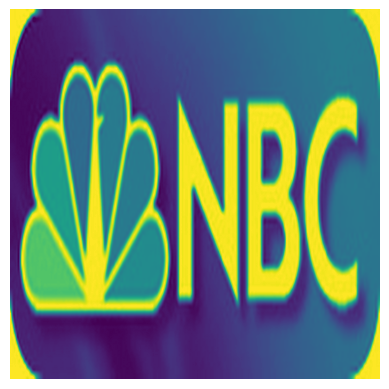

In [21]:
import numpy as np
import matplotlib.pyplot as plt

one_pic = features.iloc[0]
one_pic_array = one_pic.values.astype(float)  # Convert to float
one_pic_image = one_pic_array.reshape((227, 227))

plt.imshow(one_pic_image, interpolation="lanczos")
plt.axis("off")
plt.show()


In [22]:
sgd_clf.predict([one_pic])
#the classifier guesses the right label - it guessed right in this particular case!

array(['Nbc'], dtype='<U9')

In [23]:
##Check performance, see ch3 (matrix...)
#https://pyimagesearch.com/2021/07/26/pytorch-image-classification-with-pre-trained-networks/

#Cross-Validation
from sklearn.model_selection import cross_val_score, cross_val_predict

cross_val_score(sgd_clf, images_train_set, labels_train_set)
#the scores look all quite good, bove 90% on all folds, but it could still perform better

array([0.94352617, 0.92561983, 0.9338843 , 0.94758621, 0.94206897])

In [25]:
#Precision and Recall
from sklearn.metrics import precision_score, recall_score

labels_predicted=cross_val_predict(sgd_clf, images_train_set, labels_train_set, cv=3)
print(precision_score(labels_train_set, labels_predicted, average="micro"))
print(recall_score(labels_train_set, labels_predicted, average="micro"))
#also quite good: precision 92% and recall 92% (both???)

0.9203417861080485
0.9203417861080485
